In [1]:
# Analysing Big Data with Pyspark

In [22]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Create a SparkSession
spark = SparkSession.builder.appName("BFRO_Sightings_Analysis").getOrCreate()

# Load the data into a Spark DataFrame
df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("ignoreLeadingWhiteSpace", "true").option("ignoreTrailingWhiteSpace", "true").option(
    "quote", "\"").option("charset", "UTF-8").option("mode", "DROPMALFORMED").option("columns", "col1 string, col2 string, col3 string").load("data/bfro_reports_geocoded.csv")

# Show the first 10 rows of the DataFrame
df.show(10)

+--------------------+--------------------+-----------------+--------------+------+--------------------+--------+---------+----------+-------+--------------+----------+----------------+---------------+---------------+---------+--------+-----------+----------+----------------+------------------+----------------+--------+--------------------+--------------------+--------+----------+------------+----------+
|            observed|    location_details|           county|         state|season|               title|latitude|longitude|      date| number|classification|   geohash|temperature_high|temperature_mid|temperature_low|dew_point|humidity|cloud_cover|moon_phase|precip_intensity|precip_probability|     precip_type|pressure|             summary|          conditions|uv_index|visibility|wind_bearing|wind_speed|
+--------------------+--------------------+-----------------+--------------+------+--------------------+--------+---------+----------+-------+--------------+----------+----------------

In [24]:
# Print the schema of the DataFrame
df.columns

['observed',
 'location_details',
 'county',
 'state',
 'season',
 'title',
 'latitude',
 'longitude',
 'date',
 'number',
 'classification',
 'geohash',
 'temperature_high',
 'temperature_mid',
 'temperature_low',
 'dew_point',
 'humidity',
 'cloud_cover',
 'moon_phase',
 'precip_intensity',
 'precip_probability',
 'precip_type',
 'pressure',
 'summary',
 'conditions',
 'uv_index',
 'visibility',
 'wind_bearing',
 'wind_speed']

In [25]:

# Count the number of sightings per state and sort in descending order
state_counts = df.groupBy("state").count().orderBy(desc("count"))

# Show the top 10 states with the most sightings
state_counts.show(10)

+----------+-----+
|     state|count|
+----------+-----+
|Washington|  407|
|California|  265|
|   Florida|  228|
|      Ohio|  209|
|  Illinois|  186|
|     Texas|  165|
|    Oregon|  159|
|  Michigan|  156|
|  Missouri|  109|
|   Georgia|   98|
+----------+-----+
only showing top 10 rows



In [26]:
# Calculate the number of sightings per month:
sightings_per_month = df.groupBy(
    month("date").alias("month")).count().orderBy("month")
sightings_per_month.show()

+-----+-----+
|month|count|
+-----+-----+
| null| 2198|
|    1|  193|
|    2|  121|
|    3|  129|
|    4|  167|
|    5|  200|
|    6|  285|
|    7|  351|
|    8|  323|
|    9|  275|
|   10|  388|
|   11|  284|
|   12|  168|
+-----+-----+



In [27]:
# Find the most common classification:
most_common_classification = df.groupBy(
    "classification").count().orderBy(desc("count"))
most_common_classification.show(10)

+--------------+-----+
|classification|count|
+--------------+-----+
|       Class B| 1778|
|       Class A| 1762|
|          null|  101|
|        Summer|   33|
|          Fall|   16|
|       Class C|   14|
|        Spring|   14|
|        Winter|   13|
|    Washington|    8|
|       Florida|    7|
+--------------+-----+
only showing top 10 rows



In [28]:
df = df.withColumn("SightMonth", month(col("date"))) \
    .withColumn("SightYear", year(col("date")))

df_count = df.groupBy("SightMonth") \
             .count() \
             .withColumn("Percentage", round(col("count")/df.count()*100, 4))

In [117]:
df_count.show()

+----------+-----+----------+
|SightMonth|count|Percentage|
+----------+-----+----------+
|        12|  168|    3.3058|
|      null| 2198|   43.2507|
|         1|  193|    3.7977|
|         6|  285|     5.608|
|         3|  129|    2.5384|
|         5|  200|    3.9355|
|         9|  275|    5.4113|
|         4|  167|    3.2861|
|         8|  323|    6.3558|
|         7|  351|    6.9067|
|        10|  388|    7.6348|
|        11|  284|    5.5884|
|         2|  121|     2.381|
+----------+-----+----------+



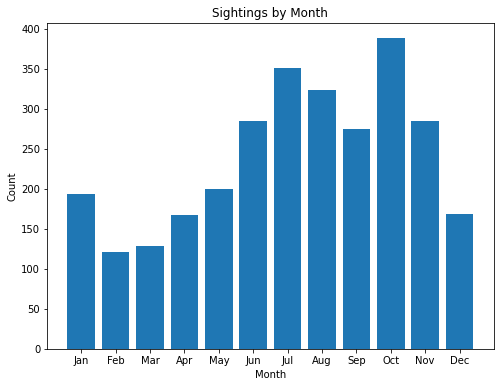

In [15]:


# Convert the PySpark DataFrame to a Pandas DataFrame
df_panda = df_count.toPandas()

# Set the plot size
plt.figure(figsize=(8, 6))

# Create the bar chart
plt.bar(df_panda['SightMonth'], df_panda['count'])

# Set the x-axis labels
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr',
           'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set the plot title and axis labels
plt.title('Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

In [43]:
spark.stop()